# <b>1 <span style='color:#0386f7de'>|</span> Stroke Prediction</b>

# <b>2 <span style='color:#0386f7de'>|</span> Importing libraries </b>

In [ ]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# statistics tools
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from keras import layers
from keras.layers import Input, Dense,BatchNormalization,Dropout
from keras.models import Sequential
from tensorflow.keras import layers
%pip install livelossplot
from livelossplot import PlotLossesKeras

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# <b>3 <span style='color:#0386f7de'>|</span> Reading the dataset </b>

In [ ]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/FrancescaFati/SmartHospitals2024/main/healthcare-dataset-stroke-data.csv')

In [ ]:
# TODO
# dimensions of data
df.shape

(5110, 12)

In [ ]:
# TODO
# visualize the first 10 rows
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
# column names
print(df.columns.tolist())

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [ ]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

# <b>4 <span style='color:#0386f7de'>|</span> Data Visualization</b>

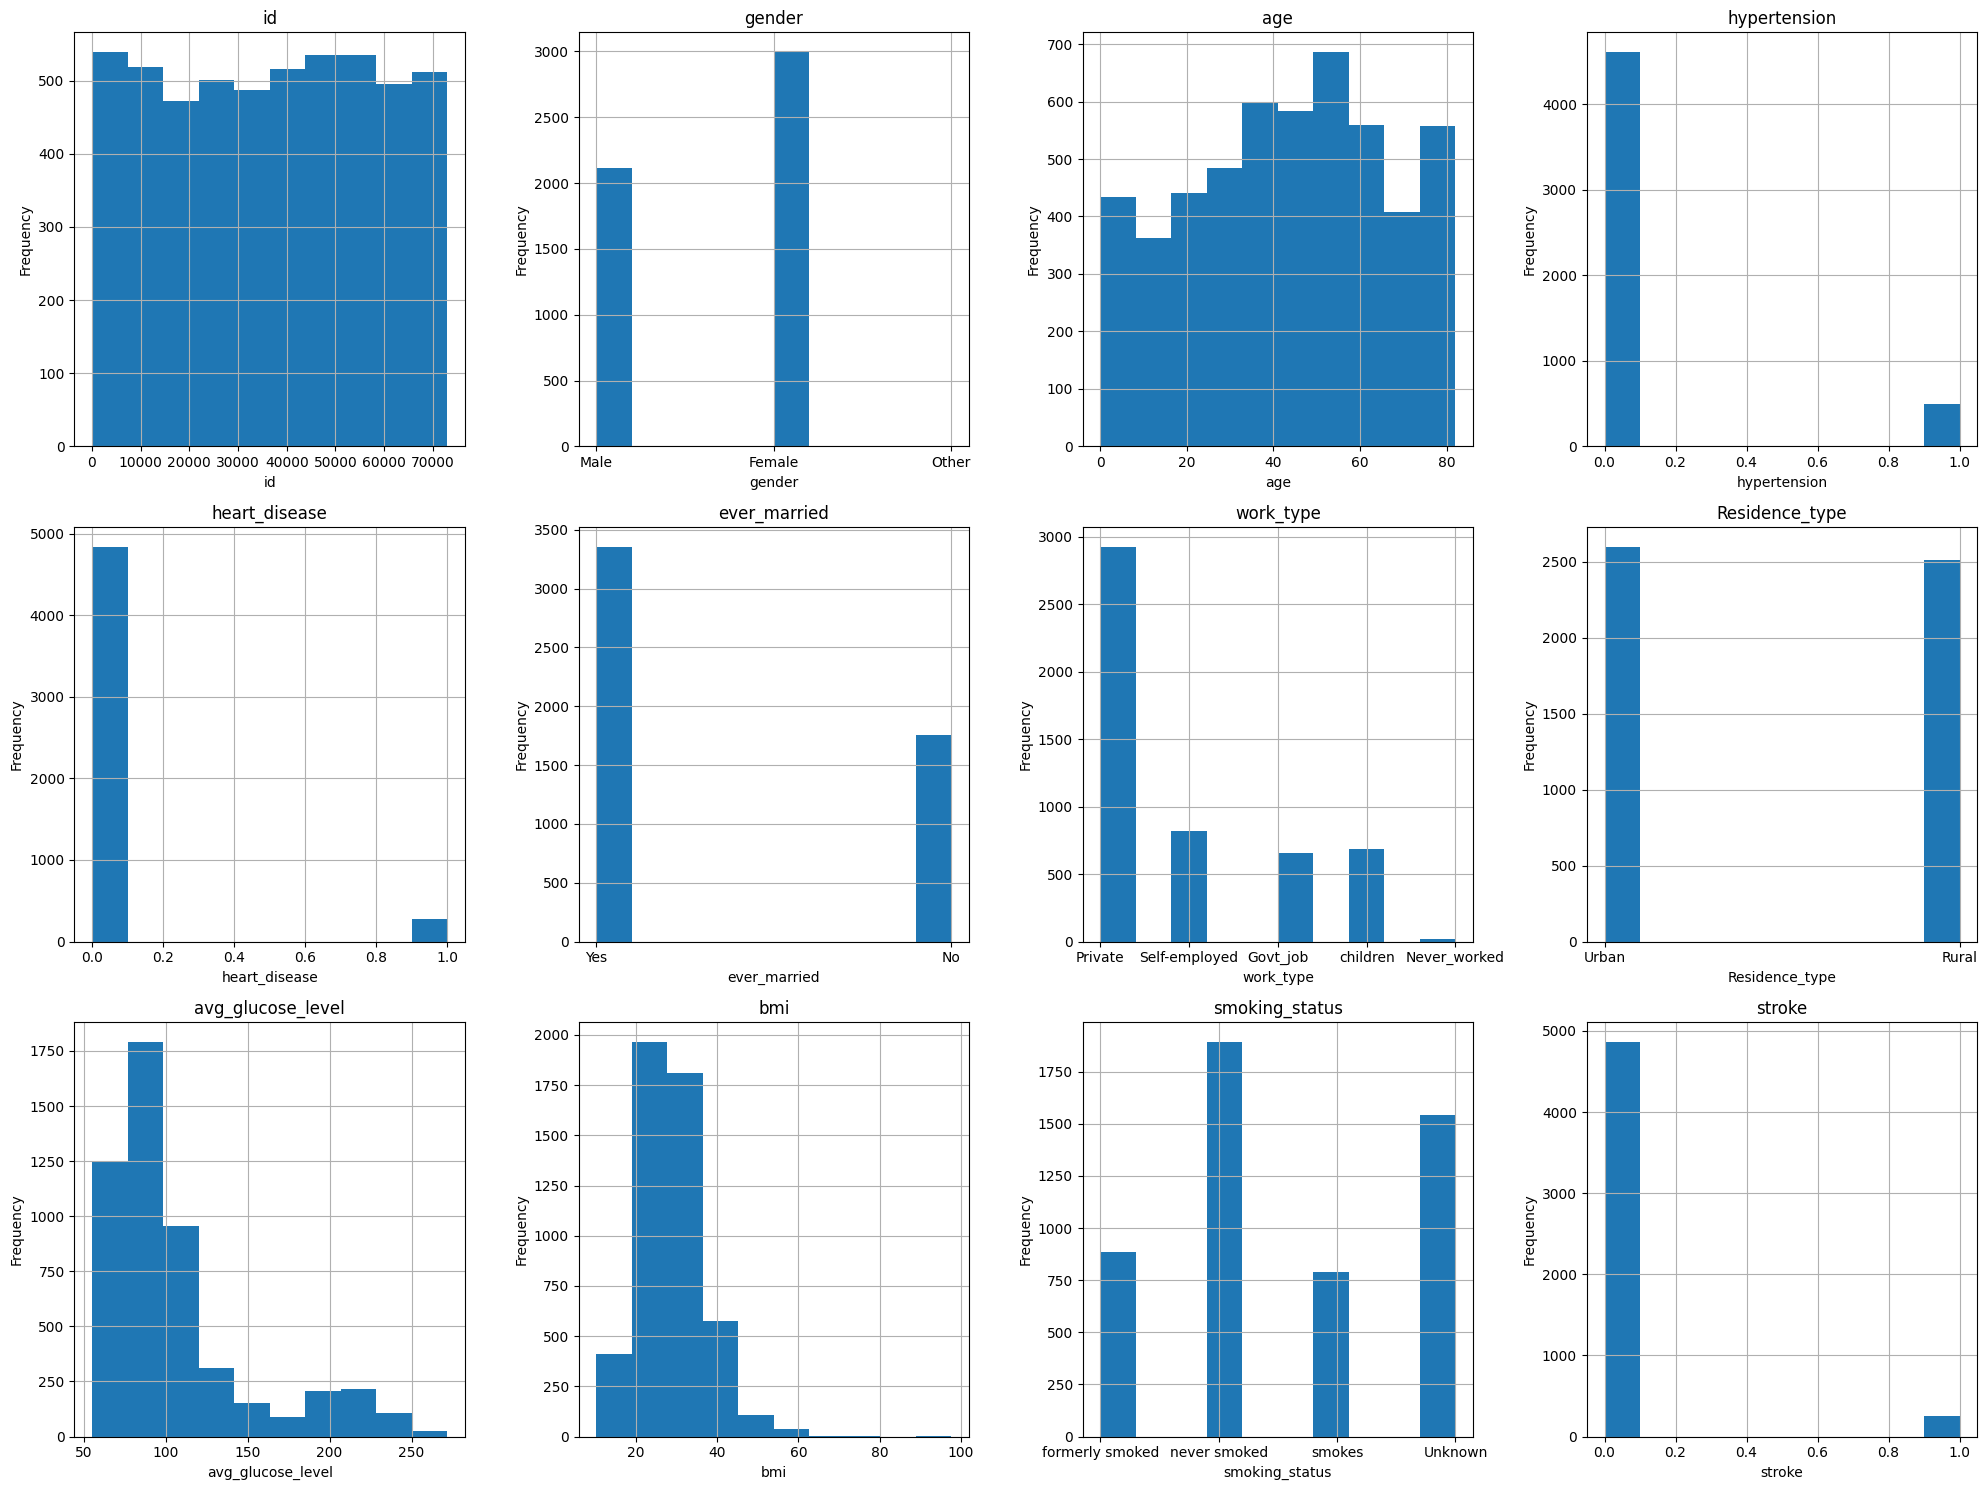

In [ ]:
n_rows = 3
n_cols = int(np.ceil(len(df.columns) / n_rows))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

for i, column in enumerate(df.columns):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    df[column].hist(ax=ax)
    ax.set_title(f'{column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

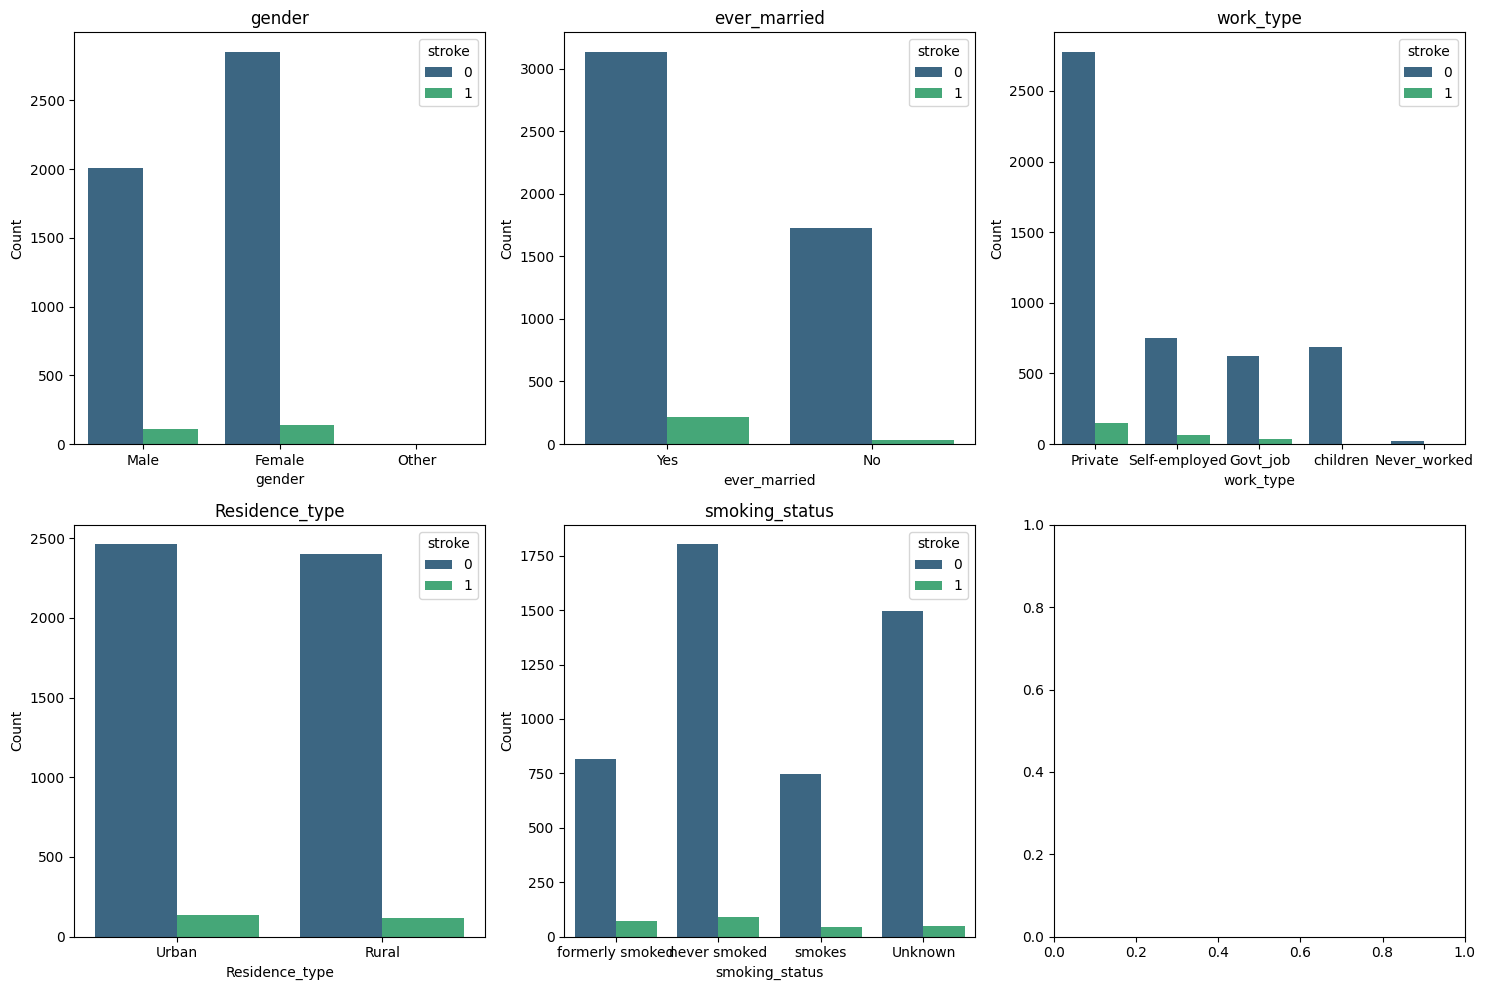

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

n_rows = 2
n_cols = int(np.ceil(len(categorical_cols) / n_rows))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), squeeze=False)

for i, column in enumerate(categorical_cols):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.countplot(data=df, x=column, palette='viridis', hue='stroke', ax=ax)
    ax.set_title(f'{column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

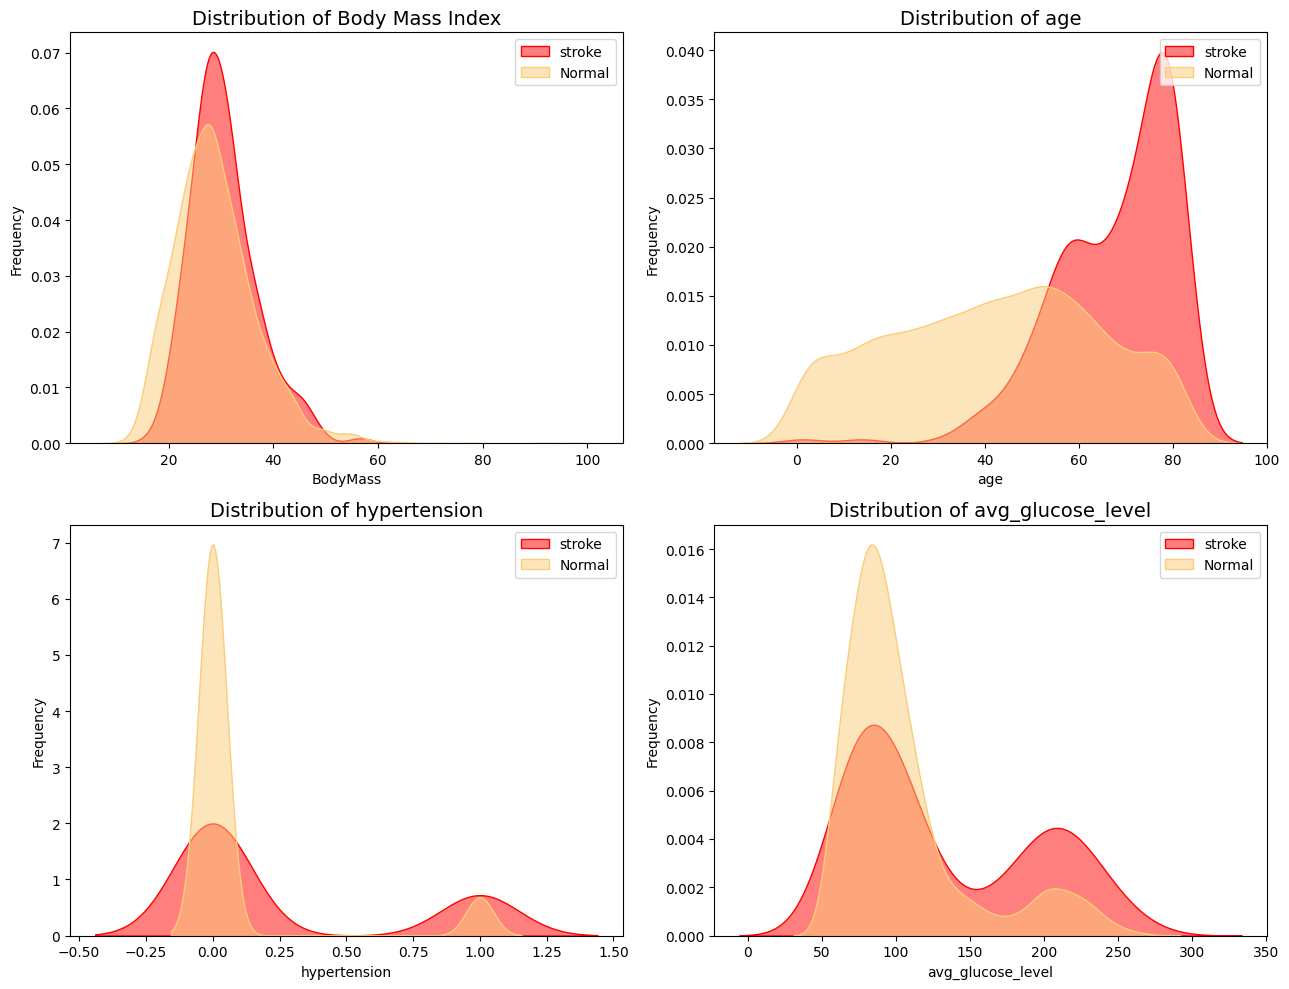

In [ ]:
# Setup the matplotlib figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

ax = axes.ravel()

# Plot 1: Distribution of bmi
sns.kdeplot(df[df["stroke"]==1]["bmi"], alpha=0.5, fill=True, color="red", label="stroke", ax=ax[0])
sns.kdeplot(df[df["stroke"]==0]["bmi"], alpha=0.5, fill=True, color="#fccc79", label="Normal", ax=ax[0])
ax[0].set_title('Distribution of Body Mass Index', fontsize=14)
ax[0].set_xlabel("BodyMass")
ax[0].set_ylabel("Frequency")
ax[0].legend()

# Plot 2: Distribution of SleepTime
sns.kdeplot(df[df["stroke"]==1]["age"], alpha=0.5, fill=True, color="red", label="stroke", ax=ax[1])
sns.kdeplot(df[df["stroke"]==0]["age"], alpha=0.5, fill=True, color="#fccc79", label="Normal", ax=ax[1])
ax[1].set_title('Distribution of age', fontsize=14)
ax[1].set_xlabel("age")
ax[1].set_ylabel("Frequency")
ax[1].legend()

# Plot 3: Distribution of PhysicalHealth
sns.kdeplot(df[df["stroke"]==1]["hypertension"], alpha=0.5, fill=True, color="red", label="stroke", ax=ax[2])
sns.kdeplot(df[df["stroke"]==0]["hypertension"], alpha=0.5, fill=True, color="#fccc79", label="Normal", ax=ax[2])
ax[2].set_title('Distribution of hypertension', fontsize=14)
ax[2].set_xlabel("hypertension")
ax[2].set_ylabel("Frequency")
ax[2].legend()

# Plot 4: Distribution of MentalHealth
sns.kdeplot(df[df["stroke"]==1]["avg_glucose_level"], alpha=0.5, fill=True, color="red", label="stroke", ax=ax[3])
sns.kdeplot(df[df["stroke"]==0]["avg_glucose_level"], alpha=0.5, fill=True, color="#fccc79", label="Normal", ax=ax[3])
ax[3].set_title('Distribution of avg_glucose_level', fontsize=14)
ax[3].set_xlabel("avg_glucose_level")
ax[3].set_ylabel("Frequency")
ax[3].legend()

plt.tight_layout()
plt.show()

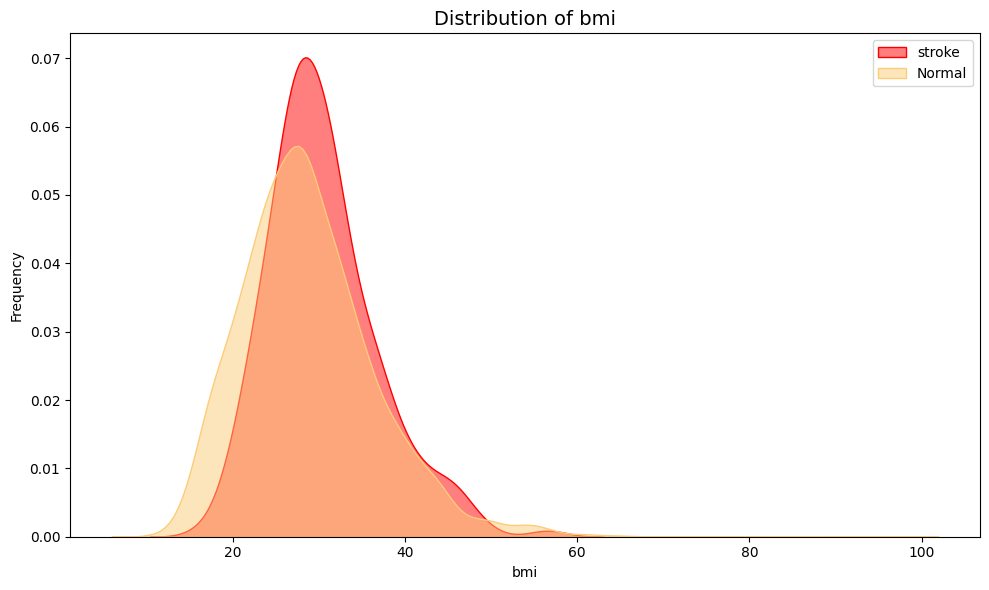

In [ ]:
#TODO
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(df[df["stroke"]==1]["bmi"], alpha=0.5, fill=True, color="red", label="stroke", )
sns.kdeplot(df[df["stroke"]==0]["bmi"], alpha=0.5, fill=True, color="#fccc79", label="Normal")
ax.set_title('Distribution of bmi', fontsize=14)
ax.set_xlabel("bmi")
ax.set_ylabel("Frequency")
ax.legend()

plt.tight_layout()
plt.show()

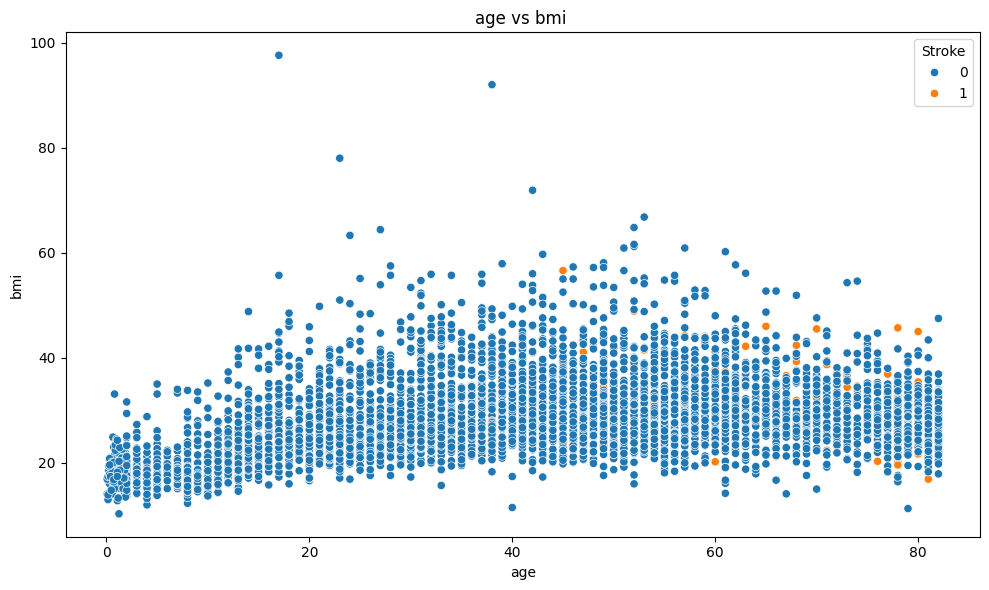

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the size as needed

# Create the scatter plot
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke', ax=ax)

ax.set_title('age vs bmi ')
ax.set_xlabel('age')
ax.set_ylabel('bmi')
ax.legend(title='Stroke')

plt.tight_layout()
plt.show()

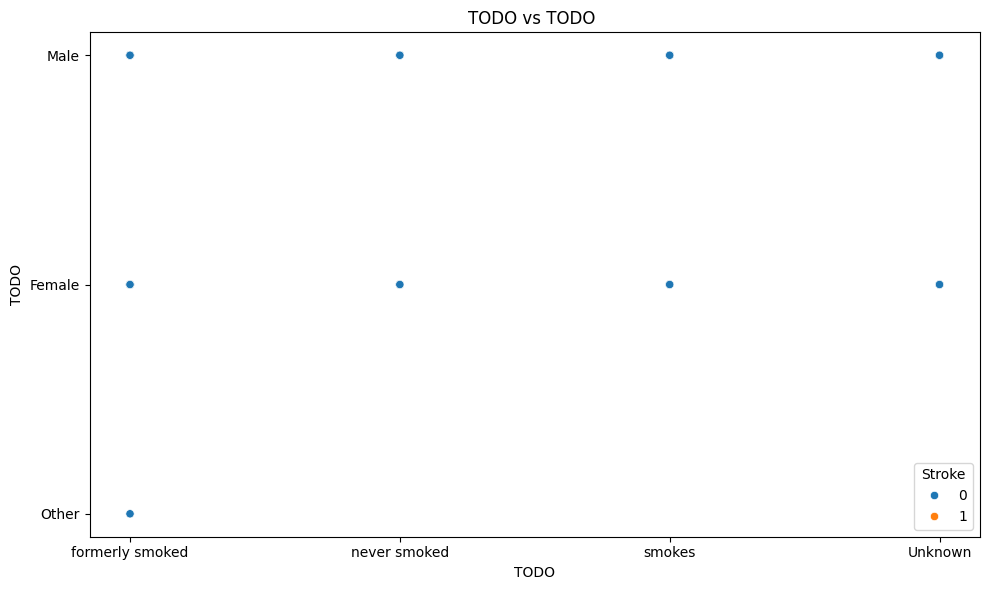

In [ ]:
#TODO
fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the size as needed

# Create the scatter plot
sns.scatterplot(data=df, x='smoking_status', y='gender', hue='stroke', ax=ax)

ax.set_title('TODO vs TODO ')
ax.set_xlabel('TODO')
ax.set_ylabel('TODO')
ax.legend(title='Stroke')

plt.tight_layout()
plt.show()

# <b>5 <span style='color:#0386f7de'>|</span> Missing Data </b>

In [ ]:
# overview of data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# TODO: find if there are NaNs
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
total_nans = df.isna().sum().sum()
print("Total number of NaNs in the DataFrame:", total_nans)

Total number of NaNs in the DataFrame: 201


In [ ]:
nans_per_column = df.isna().sum()
print("Number of NaNs per column:\n", nans_per_column)

Number of NaNs per column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


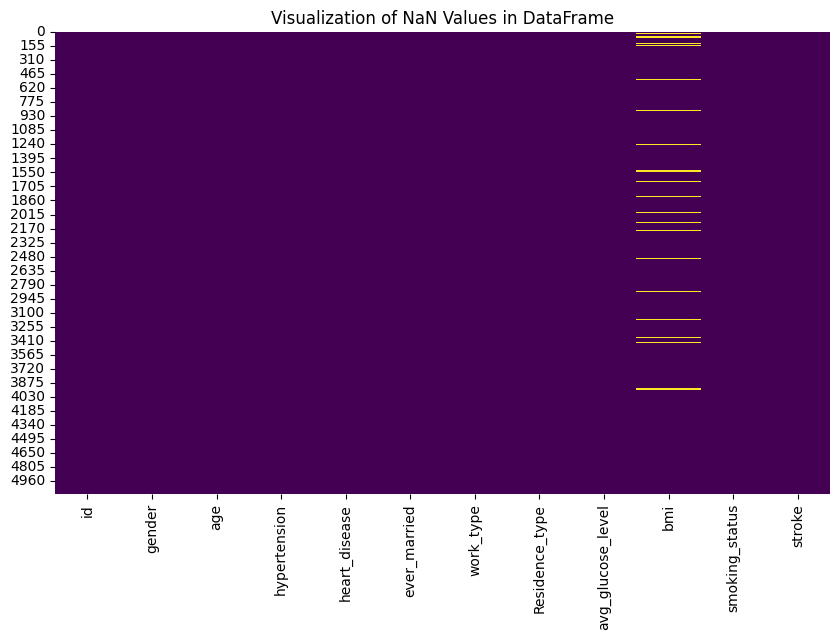

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Visualization of NaN Values in DataFrame')
plt.show()


# <b>5.1 <span style='color:#0386f7de'>|</span> Deletion Methods </b>

In [ ]:
# TODO: which deletion method is the best?

In [ ]:
df_dropped_nan = df.dropna(subset=['bmi'])
df_dropped_nan.shape

(4909, 12)

In [ ]:
df.shape

(5110, 12)

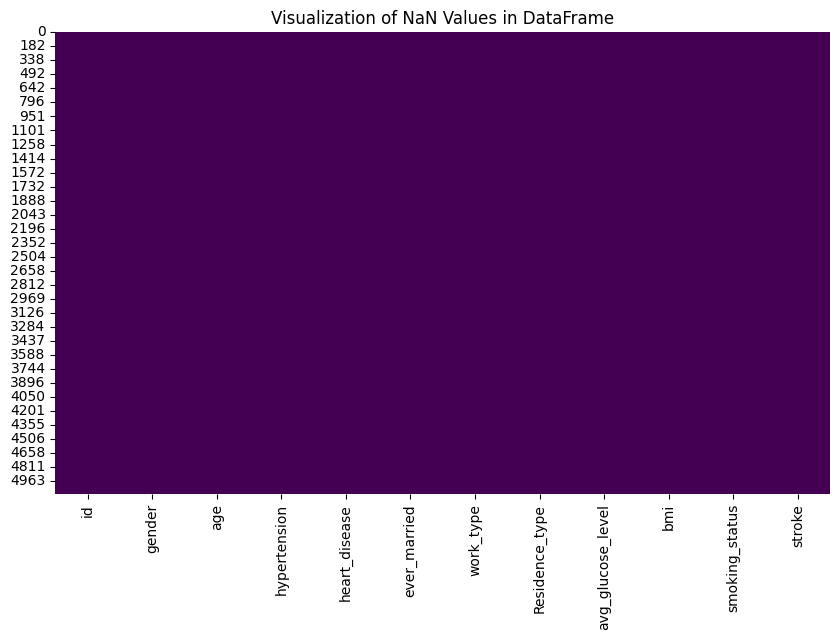

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_dropped_nan.isna(), cbar=False, cmap='viridis')
plt.title('Visualization of NaN Values in DataFrame')
plt.show()

In [ ]:
df.head(10)

# <b>5.2 <span style='color:#0386f7de'>|</span> Imputation Methods </b>

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/FrancescaFati/SmartHospitals2024/main/healthcare-dataset-stroke-data.csv')

In [ ]:
from sklearn.linear_model import LinearRegression

# Simple Linear Regression for a column
model = LinearRegression()
# Filter to ensure all used data has no NaN values in both 'HeartDisease' and 'BMI'
not_null_data = df.dropna(subset=['bmi', 'age'])
model.fit(not_null_data[['age']], not_null_data[['bmi']])

# Prepare for predictions by dropping rows with NaN in 'HeartDisease'
mask = df['bmi'].isnull() & df['age'].notnull()  # Ensure no NaN in HeartDisease for prediction
# Only predict where BMI is NaN but HeartDisease is not NaN
predicted_values = model.predict(df.loc[mask, ['age']])
df.loc[mask, 'bmi'] = predicted_values

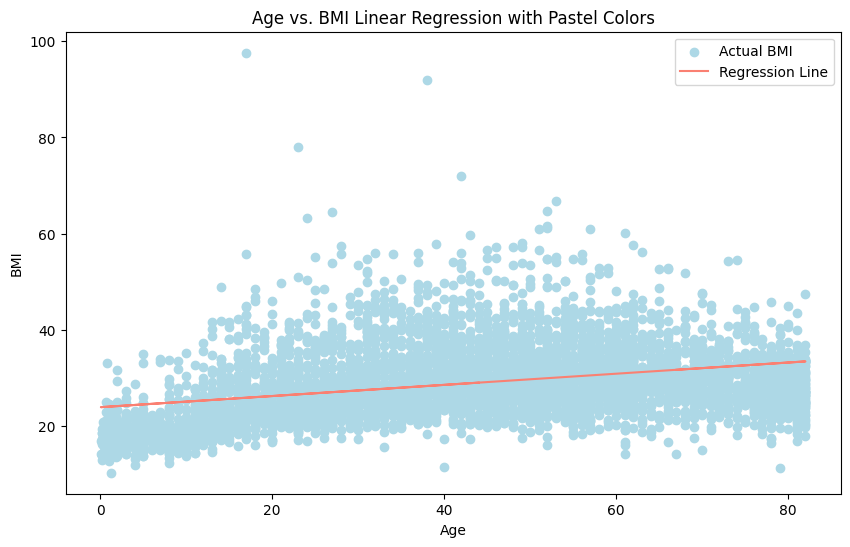

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(not_null_data['age'], not_null_data['bmi'], color='lightblue', label='Actual BMI')  # Pastel blue
plt.plot(not_null_data['age'], model.predict(not_null_data[['age']]), color='salmon', label='Regression Line')  # Pastel red
plt.title('Age vs. BMI Linear Regression with Pastel Colors')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.998572,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,30.766382,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


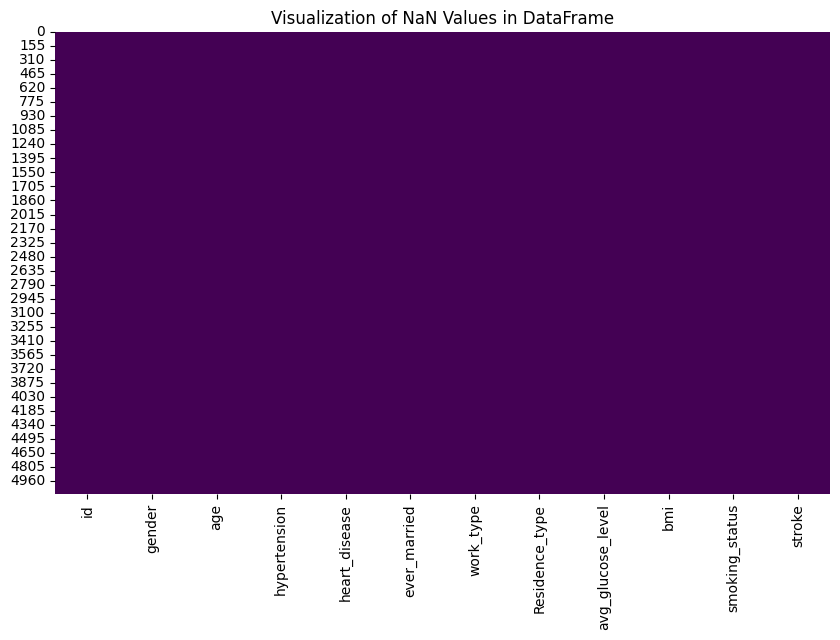

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Visualization of NaN Values in DataFrame')
plt.show()

# <b>6 <span style='color:#0386f7de'>|</span> Data Statistics </b>

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/FrancescaFati/SmartHospitals2024/main/healthcare-dataset-stroke-data.csv')

In [ ]:
# select numerical features
features_num = ['age', 'avg_glucose_level','bmi']

In [ ]:
df[features_num].describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
age,5110.000000,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
avg_glucose_level,5110.000000,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
bmi,4909.000000,28.893237,7.854067,10.300000,23.500000,28.100000,33.100000,97.600000


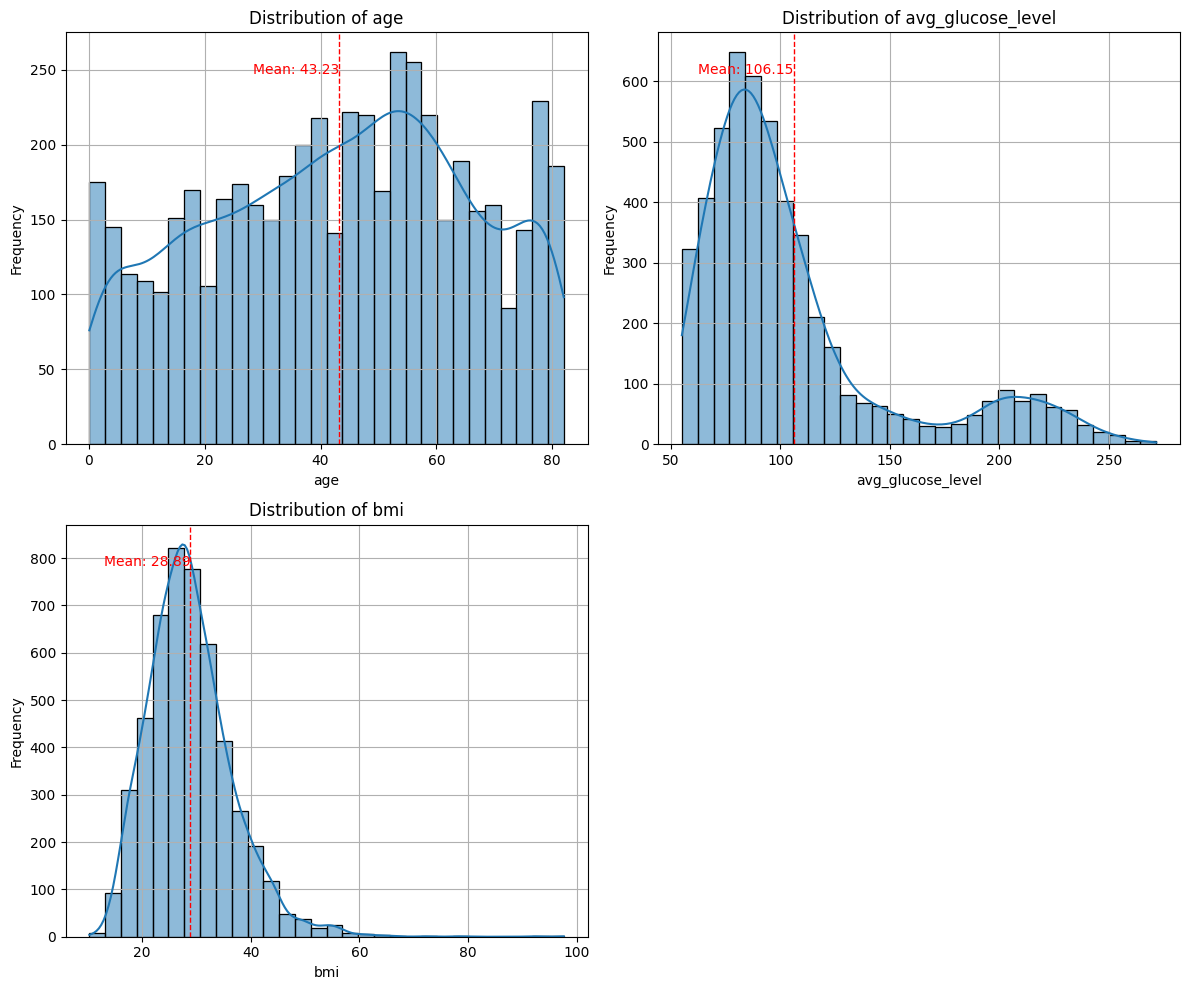

In [ ]:
# Select only numeric columns from df
numeric_df = df[features_num]

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Loop through the numeric columns and create a subplot for each column
for i, column in enumerate(numeric_df.columns):
    plt.subplot((len(numeric_df.columns) + 1) // 2, 2, i + 1)
    # Creating the histogram with a specified bin width and enabling KDE
    sns.histplot(numeric_df[column], kde=True, bins=30)  # Adjust 'bins' based on your preference

    # Add grid
    plt.grid(True)

    # Optionally calculate mean and plot it
    mean_val = numeric_df[column].mean()
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1)
    plt.text(mean_val, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', color='red', rotation=0, horizontalalignment='right')

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap and display the plot
plt.tight_layout()
plt.show()

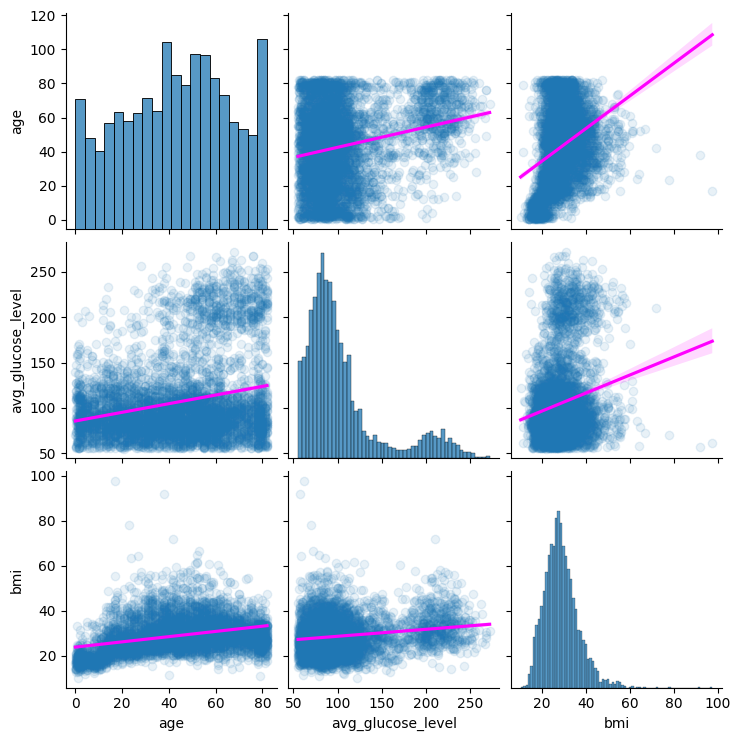

In [ ]:
# pairwise scatter plot
sns.pairplot(df[features_num],
             kind='reg',
             plot_kws={'line_kws':{'color':'magenta'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()

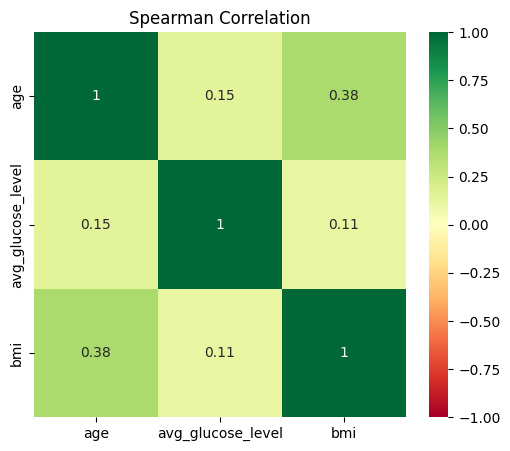

In [ ]:
# Spearman (Rank) correlation
corr_spearman = df[features_num].corr(method='spearman')

fig = plt.figure(figsize = (6,5))
sns.heatmap(corr_spearman, annot=True, cmap="RdYlGn", vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

<a id='5'></a>
# Target

In [ ]:
# calc frequencies
target_count = df['stroke'].value_counts()
print(target_count)
print()
print('Percentage of strokes [1]:', np.round(100*target_count[1] / target_count.sum(),2), '%')

stroke
0    4861
1     249
Name: count, dtype: int64

Percentage of strokes [1]: 4.87 %


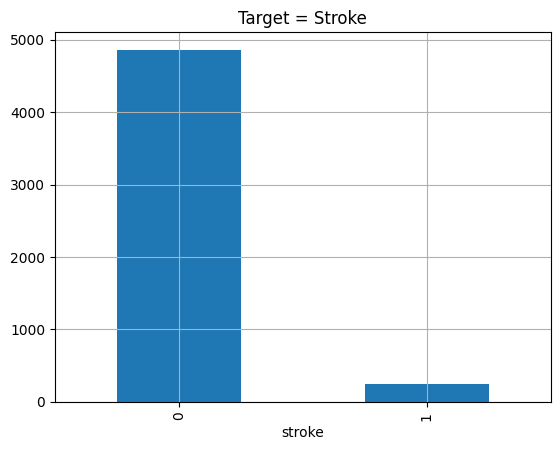

In [ ]:
# plot target distribution
target_count.plot(kind='bar')
plt.title('Target = Stroke')
plt.grid()
plt.show()

# <b>7 <span style='color:#0386f7de'>|</span> Data Augmentation </b>

In [ ]:
# Adding random noise to numeric columns
df_aug_noise = df.copy()

for col in df_aug_noise[features_num].columns:
    noise = np.random.normal(loc=0, scale=0.01, size=df_aug_noise[col].shape)
    df_aug_noise[col] += noise

In [ ]:
# Creating new features
df_new_feature = df.copy()
df_new_feature['new_feature'] = df_new_feature['bmi'] * df_new_feature['age']
df_new_feature.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,new_feature
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,2452.200000
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.998572,never smoked,1,1890.912864
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2600.000000
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1685.600000
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1896.000000
